In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.columns = [columns_name.lower() for columns_name in customer_df.columns]
customer_df.columns = [columns_name.replace(' ', '_') for columns_name in customer_df.columns]
customer_df = customer_df.set_index('customer')
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

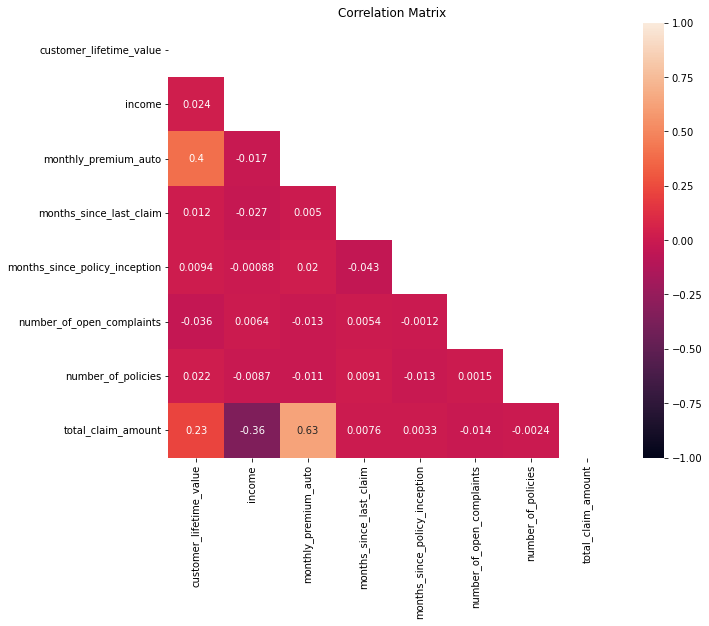

In [8]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(customer_df.corr(), dtype=bool))
sns.heatmap(customer_df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix does not show a high correlation (greather than 0.9) between any of the features and the target variable ('total_claim_amount'). The highest correlation is in between 'monthly_premium_auto' and the target, and it is uderstandable/expected to have some kind of dependecy or correlation in between these two, because the premium someone pays for their auto does indeed influence the amount they will eventually claim if they have to.

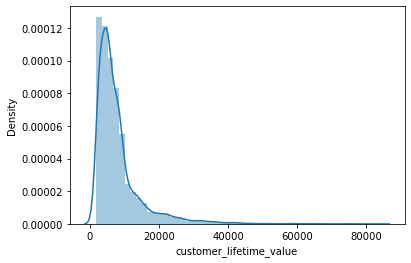

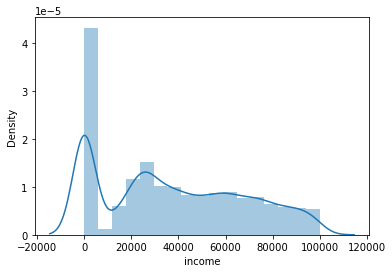

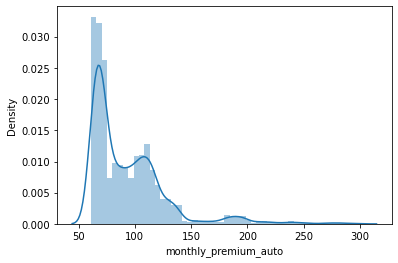

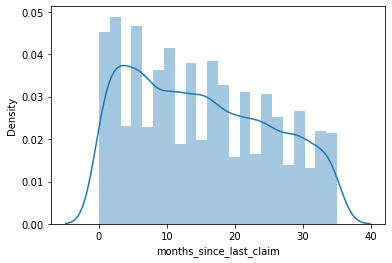

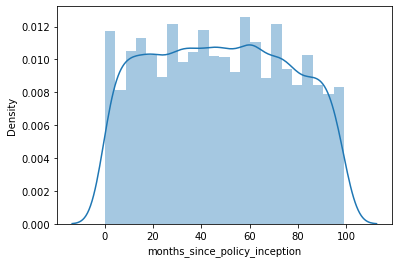

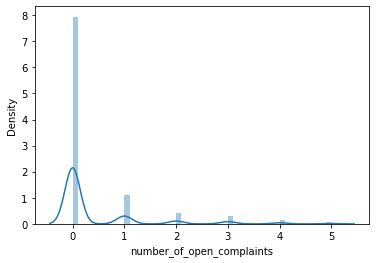

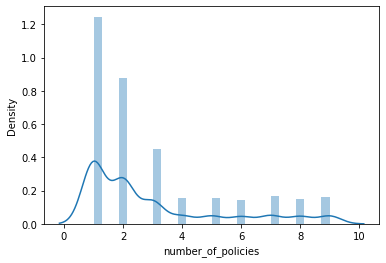

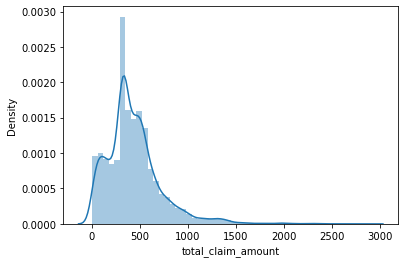

In [17]:
numerical = customer_df.select_dtypes(np.number)
for col in numerical:
    sns.distplot(customer_df[col])
    plt.show()

I do not see anything to remark. The only plot that could look more or less similar to a normal distribution is the one of 'months_since_policy_inception', but it is still far from being a normal distribution. The other seven I believe they reflect the reality and there is nothing suprising in them.


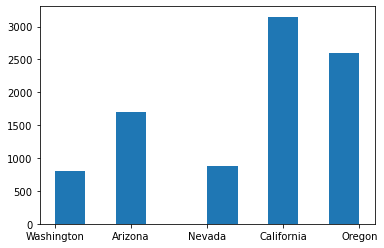

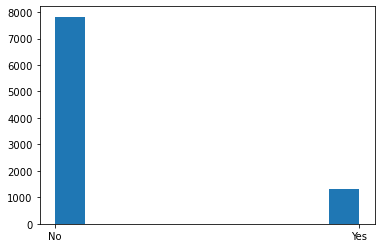

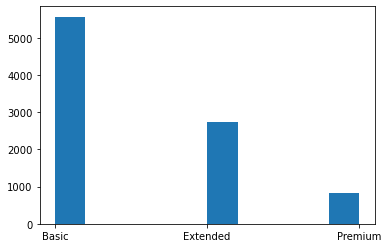

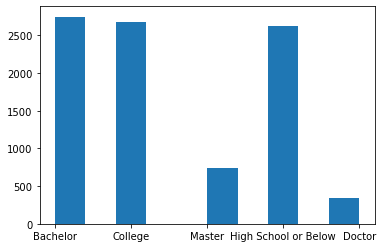

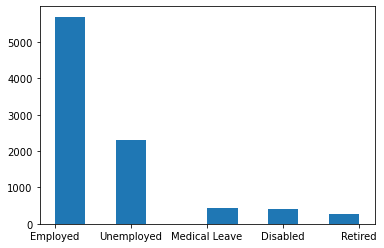

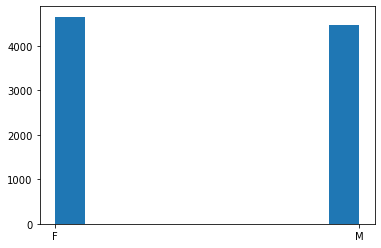

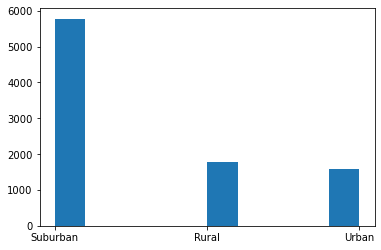

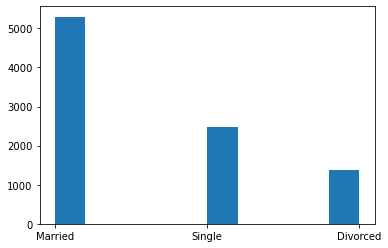

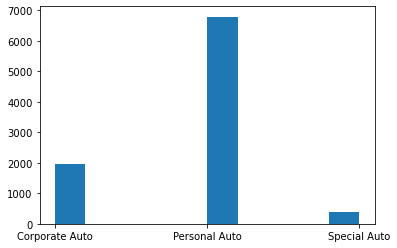

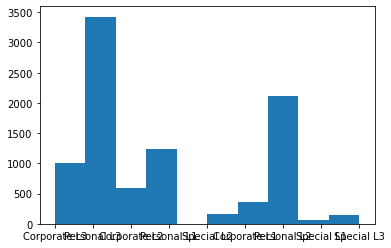

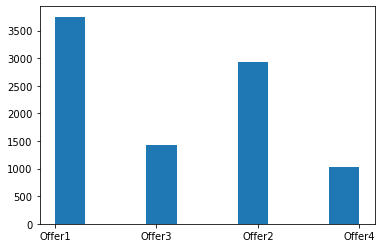

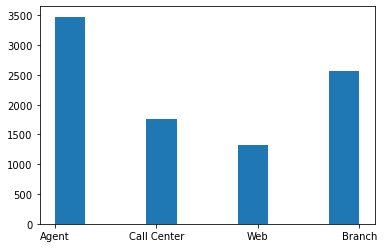

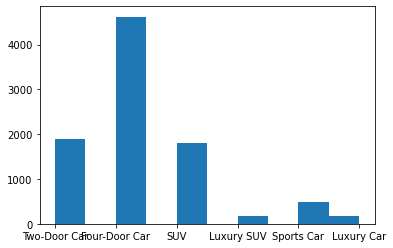

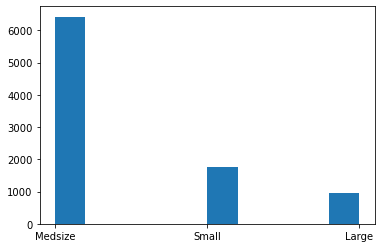

In [47]:
categorical = customer_df.select_dtypes(object)
for col in categorical:
    plt.hist(customer_df[col])
    plt.show()

I do not plot 'customer' column as it is the Customer ID, a unique identifier of each customer by which the company recognizes each customer, and we are using it as the index column. 

What I can see is that most of the customers are from "California" 'state'; the majority of the customers has "NO" as 'response'; there is preponderance toward "Basic" 'coverage'; slightly more than half of the customers have "College" or "Bachelor" 'education'; more than half of the customers are "Employed" and active; there is an equitable 'gender' balance of customers; more than half of the customers live in "Suburban" areas; more than half of the customers are "Married"; more than two-thirds of customers have coverage for a "Personal Auto"; the majority of customers have a "Personal" 'policy'; more than one-third of customers have the "Offer1" as 'renew_offer_type'; the majority of customers come "Agent" or "Branch" 'sales_channel'; the half of customers have a "Four-Door Car"; and most of the customers have a "Medsize" auto.

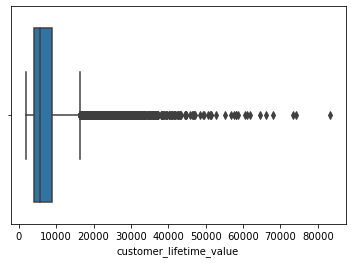

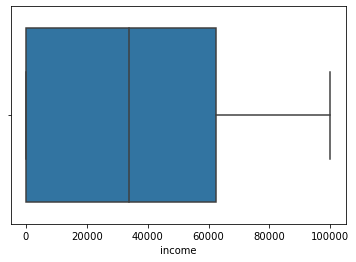

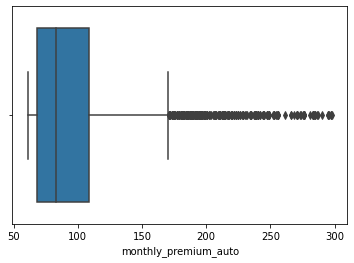

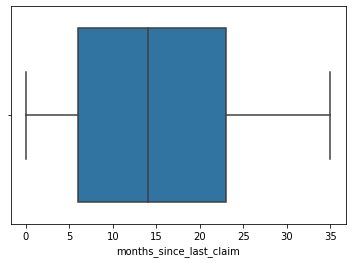

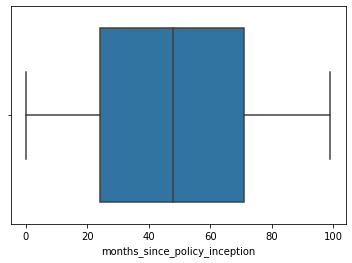

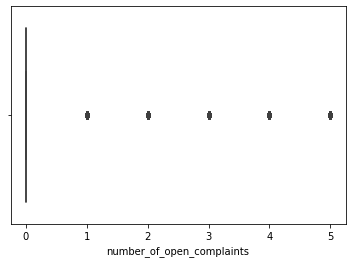

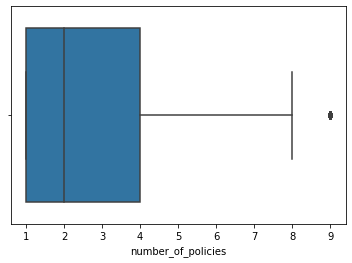

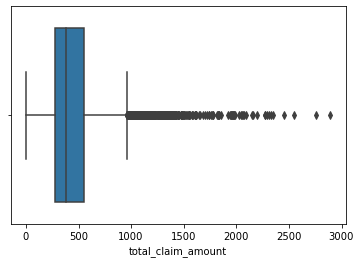

In [50]:
for col in numerical:
    sns.boxplot(customer_df[col])
    plt.show()

There are some outliers in features such as 'customer_lifetime_value', 'monthly_premium_auto', 'number_of_policies', but I believe it is natural and reflects the reality and circusmtances of the dataset. It is necesary to rememeber that not all people has the same standard of living, and as the categories within the categorical data reflect, some customers have Luxury SUV´s, Sport Cars, and Luxury Cars. Additionally, some customers have Corporate cars and Corporate policy types, so they are insured by their companies. All of the previously mentioned, Luxury and Corporate, usually have higher standards of living and higher policy premiums, so the outliers are natural and reflect the reality. I would proceed analyzing the data or building a model without removing them, at least initially, but taking into account that we have them in the dataset to better understand the results of the analysis or the metrics of the model. 

In [51]:
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [53]:
nulls = pd.DataFrame(customer_df.isna().sum()*100/len(customer_df), columns=['Percentage'])
nulls.sort_values('Percentage', ascending = False)

,Percentage
state,0.0
months_since_last_claim,0.0
vehicle_class,0.0
total_claim_amount,0.0
sales_channel,0.0
renew_offer_type,0.0
policy,0.0
policy_type,0.0
number_of_policies,0.0
number_of_open_complaints,0.0


We do not have nulls so we do not have to deal with that. 